# 1. Introduction

 In this project, we'll walk through how to set up Spark on your own computer and integrate PySpark with Jupyter Notebook. We can use Spark in two modes:

* **Local mode** - The entire Spark application runs on a single machine. Local mode is what you'll use to prototype Spark code on your own computer. It's also easier to set up.
* **Cluster mode** - The Spark application runs across multiple machines. Cluster mode is what you'll use when you want to run your Spark application across multiple machines in a cloud environment like Amazon Web Services, Microsoft Azure, or Digital Ocean.

Here's a diagram describing the high-level components you'll be setting up today:

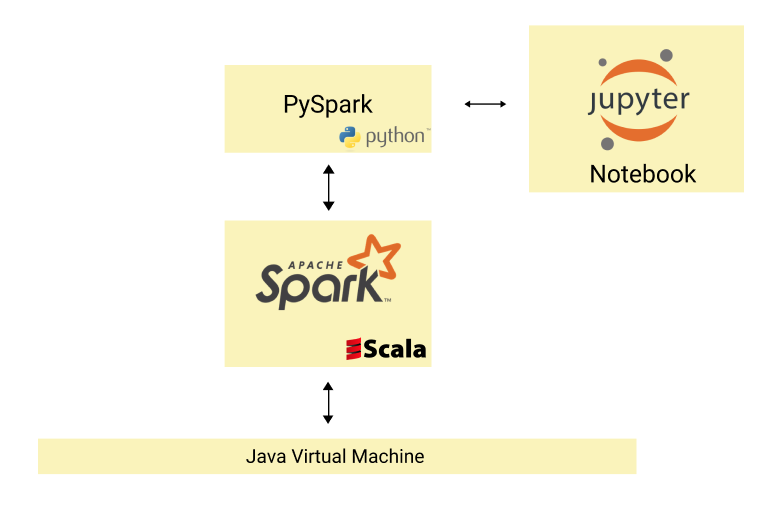

In [1]:
from IPython.display import Image
Image(filename='xgRnU89.png')

# 2. Java

`Spark runs on the Java Virtual Machine, or JVM for short,` which comes in the Java SE Development Kit (JDK for short). We recommend installing Java SE Development Kit version 7 or higher, which you can download from Oracle’s website:

http://www.oracle.com/technetwork/java/javase/downloads/jdk8-downloads-2133151.html

Each computer chip has a specific instruction set architecture that determines the maximum amount of memory it can work with. The two main types are x86 (32 bit) and x64 (64-bit). If you're not sure which one your computer has, you can find out by following this guide if [you're on Windows](http://support.wdc.com/KnowledgeBase/answer.aspx?ID=9405) or this one [if you're on Linux.](http://www.howtogeek.com/198615/how-to-check-if-your-linux-system-is-32-bit-or-64-bit/)

To verify that the installation worked, launch your command line application (Command Prompt for Windows and Terminal for Mac and Linux) and run:

java -version

If running java -version returned an error or a different version than the one you just installed, your Java JDK installation most likely wasn't added to your PATH properly. Read [this post](http://cloudlink.soasta.com/t5/CloudTest-Knowledge-Base/Adding-JDK-Path-in-Mac-OS-X-Linux-or-Windows/ta-p/43867) to learn more about how to properly add the Java executable to your PATH.

# 3. Spark

`Because you've installed JDK, you could technically download the original source code and build Spark on your computer. Building from the source code is the process of generating an executable program for your machine. It involves` [many steps](http://stackoverflow.com/a/1622520). While there are some performance benefits to building Spark from source, it takes a while to do, and it's hard to debug if the build fails.`

We'll download and work with a pre-built version of Spark instead. Navigate to the [Spark downloads page](http://spark.apache.org/downloads.html) and select the following options:

1. 1.6.2
Note: Any Spark version prior to 2.0.0 is incompatible with Python 3.6. If you have Python 3.6, we recommend downloading one of the newer versions of Spark.
2. Pre-built for Hadoop 2.6
3.  Direct Download

Next, click the link that appears in Step 4 to download Spark as a .TGZ file to your computer. Open your command line application and navigate to the folder you downloaded it to. Unzip the file and move the resulting folder into your home directory. Windows does not have a built in utility that can unzip tgz files - we recommend downloading and using [7-Zip](http://www.7-zip.org/). Once you have unzipped the file, move the resulting folder into your home directory.

# 4. PySpark Shell

 The source code for the PySpark library is located in the python/pyspark directory, but the executable version of the library is located in bin/pyspark. To test whether your installation built Spark properly, run the command bin/pyspark to start up the PySpark shell. 

While the output is verbose, you can see that the shell automatically initialized the SparkContext object and assigned it to the variable sc.

You don't have to run bin/pyspark from the folder that contains it. Because it's in your home directory, you can use ~/spark-1.6.1-bin-hadoop2.6/bin/pyspark to launch the PySpark shell from other directories on your machine (Note: replace 1.6.1 with 1.6.2 for newer version users). This way, you can switch to the directory that contains the data you want to use, launch the PySpark shell, and read the data in without having to use its full path. The folder you're in when you launch the PySpark shell will be the local context for working with files in Spark.

# 5. Jupyter Notebook

You can make your Jupyter Notebook application aware of Spark in a few different ways. One is to create a configuration file and launch Jupyter Notebook with that configuration. Another is to import PySpark at runtime. We'll focus on the latter approach, so you won't have to restart Jupyter Notebook each time you want to use Spark.

First, you'll need to copy the full path to the pre-built Spark folder and set it as a shell environment variable. This way, you can specify Spark's location a single time, and every Python program you write will have access to it. If you move the Spark folder, you can change the path specification once and your code will work just fine.

**Mac / Linux**

* Use nano or another text editor to open your shell environment's configuration file. If you're using the default Terminal application, the file should be in ~/.bash_profile . If you're using ZSH instead, your configuration file will be in ~/.zshrc.

* Add the following line to the end of the file, replacing {full path to Spark} with the actual path to Spark:

`export SPARK_HOME="{full path to Spark, eg /users/home/jeff/spark-2.0.1-bin-hadoop2.7/}"`

Exit the text editor and run either source ~/.bash_profile or source ~/.zshrc so the shell reads in and applies the update you made.

**Windows**

* If you've never added environment variables, read [this tutorial](http://pythoncentral.io/add-python-to-path-python-is-not-recognized-as-an-internal-or-external-command/) before you proceed.
* Set the SPARK_HOME environment variable to the full path of the Spark folder (e.g. c:/Users/Jeff/spark-2.0.1-bin-hadoop2.7/).
Next, let's install the [findspark](https://github.com/minrk/findspark) Python library, which looks up the location of PySpark using the environment variable we just set. Use pip to install the findspark library:

`pip install findspark`

Now that we've set up all of the tools we need, let's test the installation!

# 6. Testing your Installation

Download [recent-grads.csv](https://raw.githubusercontent.com/fivethirtyeight/data/master/college-majors/recent-grads.csv) to your computer and use the command line to navigate to its location. Start Jupyter Notebook, create a new notebook, and run the following code to test your installation:

**Find path to PySpark.**

import findspark
findspark.init()

**Import PySpark and initialize SparkContext object.**

import pyspark
sc = pyspark.SparkContext()

**Read `recent-grads.csv` in to an RDD.**

f = sc.textFile('recent-grads.csv')
data = f.map(lambda line: line.split('\n'))